In [ ]:
#import neccessary Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
 from google.colab import files
 upload = files.upload()

Saving spam.csv to spam.csv


# 1. Reading and understanding the data

In [ ]:
df = pd.read_csv('spam.csv',encoding='latin1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3360,ham,You only hate me. You can call any but you did...,NaN,NaN,NaN
1520,spam,"URGENT! Your Mobile No was awarded a å£2,000 B...",NaN,NaN,NaN
2581,ham,Yup i'm elaborating on the safety aspects and ...,NaN,NaN,NaN
691,ham,Sorry to trouble u again. Can buy 4d for my da...,NaN,NaN,NaN
4965,spam,URGENT! We are trying to contact U. Todays dra...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
#Data Cleaning
# EDA 
# Text Preprocessing
# Model building 
# Model Evaluation 
# Improvement 
# Website
# Diployment 

# 2. Data Cleaning 


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Label Enconder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
# check duplicate values
df.duplicated().sum()

403

In [ ]:
df.shape

(5572, 2)


## 3. EDA

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['target'].value_counts()

0    4825
1     747
Name: target, dtype: int64

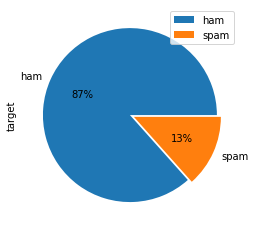

In [ ]:
plt.figure(figsize=(5,4))
df.target.value_counts(normalize=True).plot.pie(autopct='%1.0f%%',labels=['ham','spam'],legend=True,explode=(0,0.05))
plt.show()


In [ ]:
#Data is imbalaced 


In [ ]:
df['num_character'] = df['text'].apply(len)

In [ ]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# fetch number of words
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# !pip install nltk

In [ ]:
# import nltk

In [ ]:
df['num_word'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,num_character,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['num_senteces'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_character,num_word,num_senteces
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_character','num_word','num_senteces']].describe()

,num_character,num_word,num_senteces
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.695621,1.970747
std,59.690841,13.742587,1.417778
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,28.000000


In [ ]:
#ham message
df[df['target']==0][['num_character','num_word','num_senteces']].describe()

,num_character,num_word,num_senteces
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.271917,1.808705
std,58.016023,13.988885,1.328227
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [ ]:
# spam message
df[df['target']==1][['num_character','num_word','num_senteces']].describe()

,num_character,num_word,num_senteces
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.017403
std,29.183082,6.867007,1.528449
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


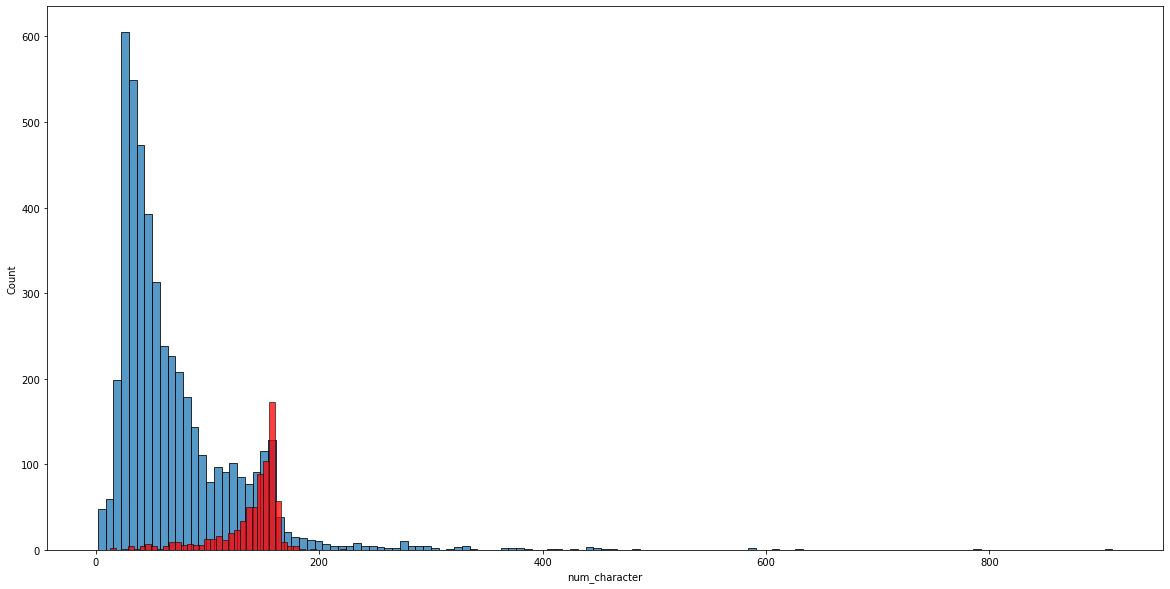

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(df[df['target']==0]['num_character'])
sns.histplot(df[df['target']==1]['num_character'],color='red')
plt.show()

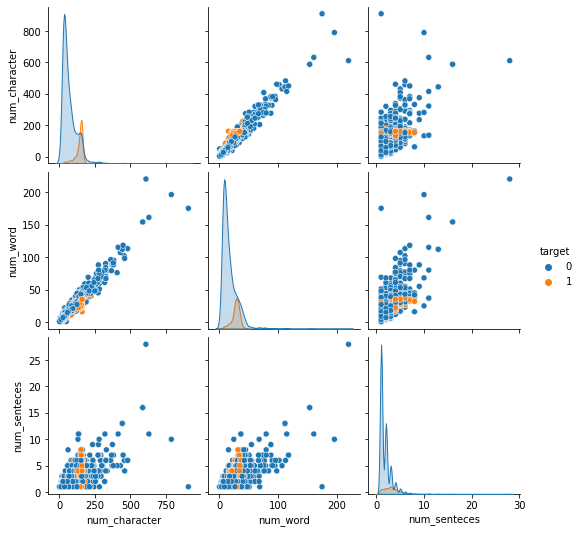

In [ ]:
sns.pairplot(df,hue='target')

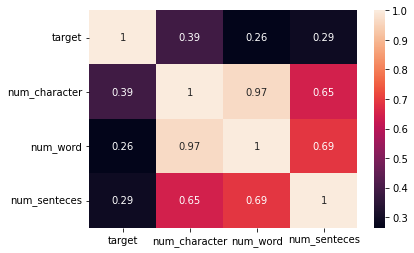

In [ ]:
sns.heatmap(df.corr(),annot=True)

# 4. Data Preprocessing 

- Lower case
- Tokenization
- Removing special characters
- Removing Stop words and Punctuation 
- Stemming


In [ ]:
# nltk.download()
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string

In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [ ]:
def transform_text(text):
    text=text.lower()
    text= nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [ ]:

import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
transform_text('Hi How Are YOu 20%% eg dancing')

'hi 20 eg danc'

In [ ]:
# import nltk

In [ ]:
transform_text('hi how are you pratik')

'hi pratik'

In [ ]:
 df['transfrom_text'] = df['text'].apply(transform_text)

In [ ]:
from wordcloud import WordCloud
# wc = WorldCloud(width=50,height=50,min_font_size=10,background_color='white')

In [ ]:

from wordcloud import WordCloud 

In [ ]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
df.head()

,target,text,num_character,num_word,num_senteces,transfrom_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
spam_wc= wc.generate(df[df['target']==1]['transfrom_text'].str.cat(sep=" "))

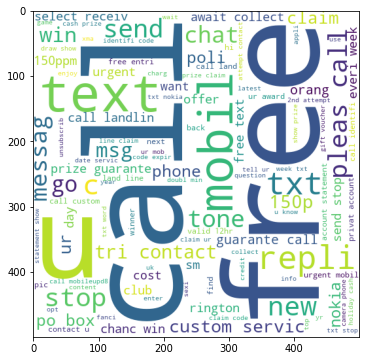

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.show()

In [ ]:
ham_wc= wc.generate(df[df['target']==0]['transfrom_text'].str.cat(sep=" "))

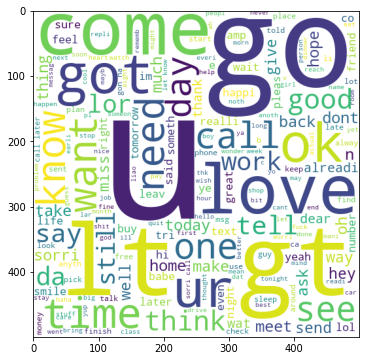

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
plt.show()

In [ ]:
# Top 30 words in spam or ham


In [ ]:
spam_corpus = []
for msg in df[df['target']==1]['transfrom_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

11490

In [ ]:
# ! pip install Counter

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


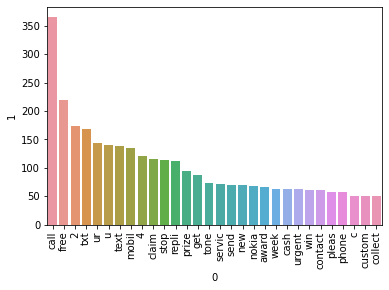

In [ ]:
from collections import Counter 
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['target']==0]['transfrom_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


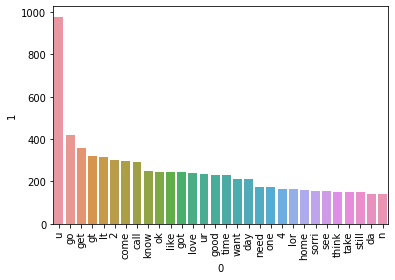

In [ ]:
from collections import Counter 
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 5. Model Building 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=4000)

In [ ]:
x = tfidf.fit_transform(df['transfrom_text']).toarray()

In [ ]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
x.shape

(5572, 4000)

In [ ]:
y = df['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

## train-test Split 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8690582959641255
[[844 113]
 [ 33 125]]
0.5252100840336135


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("Accurancy of the Multinomial naye bayes:",accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print("Precision of theMultinomial naye bayes:",precision_score(y_test,y_pred2))

Accurancy of the Multinomial naye bayes: 0.9632286995515695
[[956   1]
 [ 40 118]]
Precision of theMultinomial naye bayes: 0.9915966386554622


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9721973094170404
[[955   2]
 [ 29 129]]
0.9847328244274809


In [ ]:
# tfidf---> mnb is good precision score in our machine learning


In [ ]:
# ! pip install DecisionTree

In [ ]:
# ! pip install xgboost


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50,random_state=50)
lrc = LogisticRegression(solver='liblinear',penalty ='l1')
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
gbdt =GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators = 50,random_state=2)

In [ ]:
 clfs = {
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'Bgc':bc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9704035874439462, 0.9844961240310077)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
  
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy -",current_accuracy)
    print("Precision-",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

For  SVC
Accuracy - 0.9704035874439462
Precision- 0.9844961240310077
For  KN
Accuracy - 0.905829596412556
Precision- 1.0
For  NB
Accuracy - 0.9650224215246637
Precision- 0.9917355371900827
For  DT
Accuracy - 0.9246636771300448
Precision- 0.8775510204081632
For  LR
Accuracy - 0.9515695067264573
Precision- 0.9642857142857143
For  RF
Accuracy - 0.9695067264573991
Precision- 0.9920634920634921
For  AdaBoost
Accuracy - 0.9596412556053812
Precision- 0.959349593495935
For  Bgc
Accuracy - 0.9596412556053812
Precision- 0.9312977099236641
For  GBDT
Accuracy - 0.9363228699551569
Precision- 0.9306930693069307
For  xgb
Accuracy - 0.9300448430493273
Precision- 0.9347826086956522


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905830,1.000000
5,RF,0.969507,0.992063
2,NB,0.965022,0.991736
0,SVC,0.970404,0.984496
4,LR,0.951570,0.964286
6,AdaBoost,0.959641,0.959350
9,xgb,0.930045,0.934783
7,Bgc,0.959641,0.931298
8,GBDT,0.936323,0.930693
3,DT,0.924664,0.877551


In [ ]:
performance_df1 = pd.melt(performance_df,id_vars="Algorithm")

In [ ]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905830
1,RF,Accuracy,0.969507
2,NB,Accuracy,0.965022
3,SVC,Accuracy,0.970404
4,LR,Accuracy,0.951570
5,AdaBoost,Accuracy,0.959641
6,xgb,Accuracy,0.930045
7,Bgc,Accuracy,0.959641
8,GBDT,Accuracy,0.936323
9,DT,Accuracy,0.924664


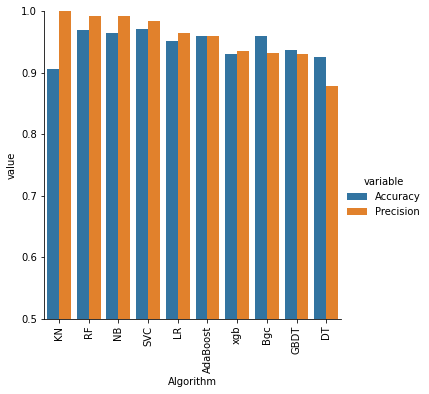

In [ ]:
sns.catplot(x='Algorithm',y = 'value',
            hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#model Improvement
# 1. Change the ma_feature parameter of Tfidf

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})

In [ ]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_ft_3000,Precision_max_ft_3000
0,KN,0.905830,1.000000,0.905830,1.000000
1,RF,0.969507,0.992063,0.969507,0.992063
2,NB,0.965022,0.991736,0.965022,0.991736
3,SVC,0.970404,0.984496,0.970404,0.984496
4,LR,0.951570,0.964286,0.951570,0.964286
5,AdaBoost,0.959641,0.959350,0.959641,0.959350
6,xgb,0.930045,0.934783,0.930045,0.934783
7,Bgc,0.959641,0.931298,0.959641,0.931298
8,GBDT,0.936323,0.930693,0.936323,0.930693
9,DT,0.924664,0.877551,0.924664,0.877551


In [ ]:
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))